### __(1) 하루 승인 거래 건수 분석__

In [2]:
cd sample_data/

/content/sample_data


In [3]:
pwd

'/content/sample_data'

In [4]:
ls

anscombe.json*                mnist_test.csv         trns_1day_series.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('trns_1day_series.csv')
df.head()

,SEND,RECV,APPROVAL,REJECT
0,4779,5045,4024,755
1,5103,5055,4196,907
2,5035,5073,4653,382
3,4757,4762,4530,227
4,4639,4664,4425,214


In [9]:
df.describe()

,SEND,RECV,APPROVAL,REJECT
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,10274.082639,10274.831944,10062.034722,212.047917
std,6683.456958,6683.442065,6584.390468,135.078228
min,769.000000,769.000000,714.000000,16.000000
25%,3580.750000,3579.250000,3469.000000,84.000000
50%,11115.000000,11133.500000,10901.500000,210.500000
75%,15745.000000,15729.250000,15451.000000,305.000000
max,24859.000000,24911.000000,24565.000000,907.000000


In [10]:
len(df)

1440

In [11]:
pd.date_range('00:00', '23:59', freq = '1min')

DatetimeIndex(['2021-03-08 00:00:00', '2021-03-08 00:01:00',
               '2021-03-08 00:02:00', '2021-03-08 00:03:00',
               '2021-03-08 00:04:00', '2021-03-08 00:05:00',
               '2021-03-08 00:06:00', '2021-03-08 00:07:00',
               '2021-03-08 00:08:00', '2021-03-08 00:09:00',
               ...
               '2021-03-08 23:50:00', '2021-03-08 23:51:00',
               '2021-03-08 23:52:00', '2021-03-08 23:53:00',
               '2021-03-08 23:54:00', '2021-03-08 23:55:00',
               '2021-03-08 23:56:00', '2021-03-08 23:57:00',
               '2021-03-08 23:58:00', '2021-03-08 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

In [16]:
df['TIME'] = pd.date_range('00:00', '23:59', freq = '1min')
df = df.set_index('TIME')
df

,SEND,RECV,APPROVAL,REJECT
TIME,,,,
2021-03-08 00:00:00,4779,5045,4024,755
2021-03-08 00:01:00,5103,5055,4196,907
2021-03-08 00:02:00,5035,5073,4653,382
2021-03-08 00:03:00,4757,4762,4530,227
2021-03-08 00:04:00,4639,4664,4425,214
...,...,...,...,...
2021-03-08 23:55:00,5280,5269,5110,170
2021-03-08 23:56:00,5202,5210,5056,146
2021-03-08 23:57:00,5210,5221,5006,204


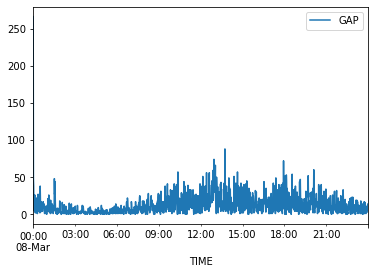

In [17]:
df['GAP'] = np.abs(df.SEND - df.RECV)
df.plot(y = 'GAP')

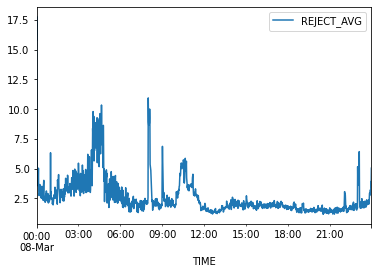

In [18]:
df['REJECT_AVG'] = df.REJECT / (df.APPROVAL + df.REJECT) * 100
df.plot(y = 'REJECT_AVG')

In [20]:
len(df)

1440

In [21]:
np.arange(0, len(df))

array([   0,    1,    2, ..., 1437, 1438, 1439])

In [22]:
np.array(df.APPROVAL)

array([4024, 4196, 4653, ..., 5006, 4935, 4940])

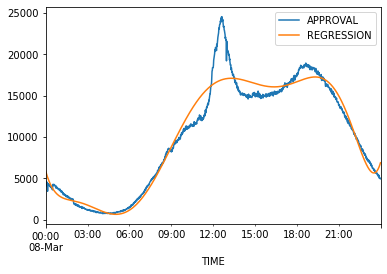

In [23]:
fp = np.polyfit(np.arange(0, len(df)), np.array(df.APPROVAL), 8)
fd = np.poly1d(fp)
df['REGRESSION'] = fd(np.arange(0, len(df)))
df.plot(y = ['APPROVAL', 'REGRESSION'])

In [24]:
((df.APPROVAL - df.REGRESSION) ** 2).sum() / 1440

2289273.532760556

In [25]:
((df.APPROVAL - df.REGRESSION) ** 2).mean()

2289273.5327605517

In [26]:
mse = ((df.APPROVAL - df.REGRESSION) ** 2).mean()
rmse = np.sqrt(mse)

print(rmse, mse)

1513.0345444703341 2289273.5327605517


In [29]:
hh_list = np.array(df.APPROVAL).reshape(24, 60)
hh_list

array([[ 4024,  4196,  4653, ...,  3684,  3586,  3576],
       [ 3507,  3689,  3542, ...,  2501,  2360,  2340],
       [ 2058,  2010,  1858, ...,  1162,  1174,  1222],
       ...,
       [13822, 13825, 13903, ..., 10940, 10827, 10839],
       [10824, 10834, 10665, ...,  7589,  7378,  7470],
       [ 7482,  7307,  7314, ...,  5006,  4935,  4940]])

In [30]:
hh_list.shape

(24, 60)

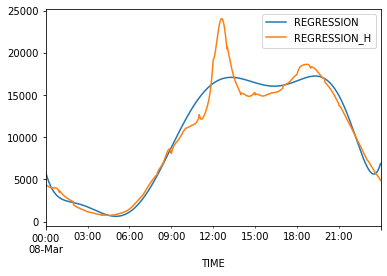

In [32]:
reg_list = []
for mm_list in hh_list:
  x = np.arange(0, 60)
  y = mm_list
  fp = np.polyfit(x, y, 4)
  fn = np.poly1d(fp)
  reg_list.append(fn(x))

df['REGRESSION_H'] = np.array(reg_list).flatten()
df.plot(y = ['REGRESSION', 'REGRESSION_H'])

### __(2) 전문 거래 로그 분석__

In [43]:
log_df = pd.read_csv('trns_msg_log.csv', sep = ':', dtype = str)
log_df

,TRNS,MSG_CODE,TIME,RESP_CODE,FIRM_CODE,SEQ
0,1,0100,133000,,03,2e65c202e525e90e1d95
1,1,0300,133000,,48,802407d045fa5d1a8287
2,1,0200,133000,,03,a1d3e524e4751b450a20
3,1,0200,133000,,11,ed976e8de9708d167a64
4,1,9300,133000,,03,b7a878a4ff5d3076dd4b
...,...,...,...,...,...,...
1995,2,9310,133107,K2,20,7abfa25505d8561d6ee3
1996,2,0430,133107,00,72,917057d635b367f53749
1997,2,0210,133108,01,11,3ecb20d384f3ef53a96a
1998,2,0430,133108,00,20,f9951616122039cadea7


In [44]:
msg_df = pd.read_csv('trns_msg_info.csv', dtype = str)
msg_df

,MSG_CODE,MSG_NAME
0,0100,MS승인요청
1,0110,MS승인응답
2,0300,IC승인 요청
3,0310,IC승인 응답
4,0420,MS승인취소 요청
5,0430,MS승인취소 응답
6,9300,기타승인 요청
7,9310,기타승인 응답
8,0400,IC승인취소 요청
9,0410,IC승인취소 응답


In [47]:
firm_df = pd.read_csv('trns_firm_info.csv', dtype=str)
firm_df

,FIRM_CODE,FIRM_NAME
0,03,IBK기업은행
1,11,NH농협은행
2,20,우리카드
3,23,SC제일은행
4,48,새마을금고
5,72,우체국


In [48]:
resp_df = pd.read_csv('trns_msg_resp_code_info.csv', dtype=str)
resp_df

,RESP_CODE,RESP_NAME
0,00,정상
1,01,정상
2,60,거래정지카드
3,63,분실도난카드
4,K2,유효검증오류
5,Z1,시스템장애


In [50]:
tf1 = pd.merge(log_df, msg_df, on=['MSG_CODE'], how='left')
tf2 = pd.merge(tf1 , firm_df, on=['FIRM_CODE'], how='left')
tf3 = pd.merge(tf2 , resp_df, on=['RESP_CODE'], how='left')
tf3.loc[tf3.TRNS == '1', 'TRNS'] = 'SEND'
tf3.loc[tf3.TRNS == '2', 'TRNS'] = 'RECV'
tf3

,TRNS,MSG_CODE,TIME,RESP_CODE,FIRM_CODE,SEQ,MSG_NAME,FIRM_NAME,RESP_NAME
0,SEND,0100,133000,,03,2e65c202e525e90e1d95,MS승인요청,IBK기업은행,NaN
1,SEND,0300,133000,,48,802407d045fa5d1a8287,IC승인 요청,새마을금고,NaN
2,SEND,0200,133000,,03,a1d3e524e4751b450a20,현금서비스 요청,IBK기업은행,NaN
3,SEND,0200,133000,,11,ed976e8de9708d167a64,현금서비스 요청,NH농협은행,NaN
4,SEND,9300,133000,,03,b7a878a4ff5d3076dd4b,기타승인 요청,IBK기업은행,NaN
...,...,...,...,...,...,...,...,...,...
1995,RECV,9310,133107,K2,20,7abfa25505d8561d6ee3,기타승인 응답,우리카드,유효검증오류
1996,RECV,0430,133107,00,72,917057d635b367f53749,MS승인취소 응답,우체국,정상
1997,RECV,0210,133108,01,11,3ecb20d384f3ef53a96a,현금서비스 응답,NH농협은행,정상
1998,RECV,0430,133108,00,20,f9951616122039cadea7,MS승인취소 응답,우리카드,정상


In [52]:
send_df = log_df[log_df.TRNS=='1']
recv_df = log_df[log_df.TRNS =='2']
tf = pd.merge(send_df, recv_df, on=['FIRM_CODE', 'SEQ'], how='outer')
tf

,TRNS_x,MSG_CODE_x,TIME_x,RESP_CODE_x,FIRM_CODE,SEQ,TRNS_y,MSG_CODE_y,TIME_y,RESP_CODE_y
0,1,0100,133000,,03,2e65c202e525e90e1d95,2,0110,133005,01
1,1,0300,133000,,48,802407d045fa5d1a8287,2,0310,133001,01
2,1,0200,133000,,03,a1d3e524e4751b450a20,2,0210,133000,01
3,1,0200,133000,,11,ed976e8de9708d167a64,2,0210,133008,00
4,1,9300,133000,,03,b7a878a4ff5d3076dd4b,2,9310,133003,01
...,...,...,...,...,...,...,...,...,...,...
995,1,0420,133059,,03,226c76440f927213fc35,2,0430,133100,00
996,1,0420,133059,,23,4a0813a414e8a43ae594,2,0430,133103,00
997,1,0420,133059,,20,f9951616122039cadea7,2,0430,133108,00
998,1,0420,133059,,72,917057d635b367f53749,2,0430,133107,00


In [53]:
tf = tf [['SEQ', 'FIRM_CODE', 'MSG_CODE_x', 'TIME_x', 'TIME_y','RESP_CODE_y']]
tf = tf.rename(columns={'MSG_CODE_x':'MSG_CODE', 'TIME_x':'SEND_TIME', 'TIME_y':'RECV_TIME',
'RESP_CODE_y':'RESP_CODE'})
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE
0,2e65c202e525e90e1d95,03,0100,133000,133005,01
1,802407d045fa5d1a8287,48,0300,133000,133001,01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01
3,ed976e8de9708d167a64,11,0200,133000,133008,00
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01
...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00
996,4a0813a414e8a43ae594,23,0420,133059,133103,00
997,f9951616122039cadea7,20,0420,133059,133108,00
998,917057d635b367f53749,72,0420,133059,133107,00


In [54]:
tf['S_DATETIME'] = pd.to_datetime(tf.SEND_TIME, format='%H%M%S')
tf['R_DATETIME'] = pd.to_datetime(tf.RECV_TIME, format='%H%M%S')
tf['TIME_GAP'] = tf.R_DATETIME - tf.S_DATETIME
tf = tf.drop(['S_DATETIME','R_DATETIME'], axis=1)
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03
...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,0 days 00:00:01
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,0 days 00:00:04
997,f9951616122039cadea7,20,0420,133059,133108,00,0 days 00:00:09
998,917057d635b367f53749,72,0420,133059,133107,00,0 days 00:00:08


SEC_GAP
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

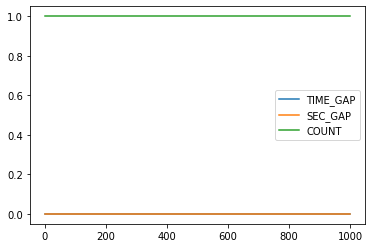

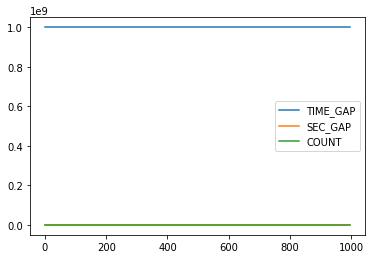

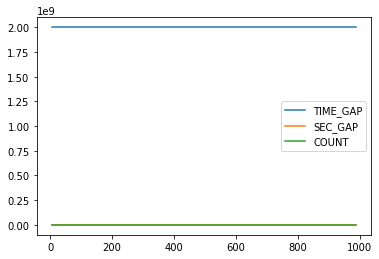

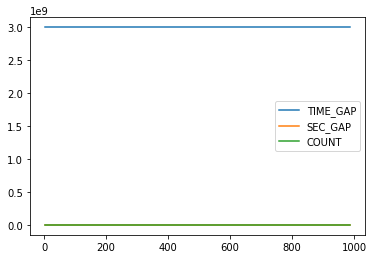

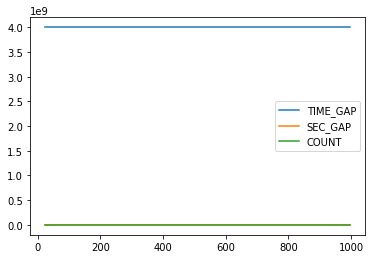

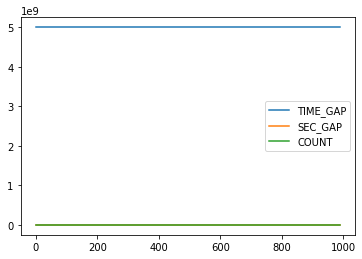

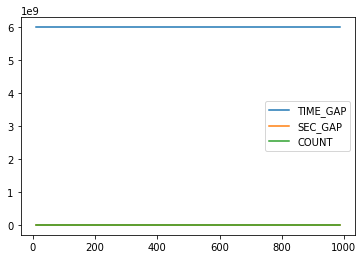

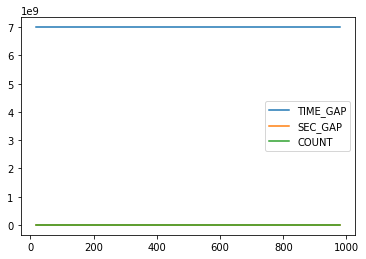

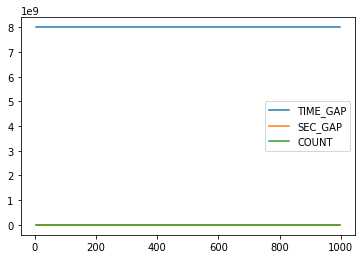

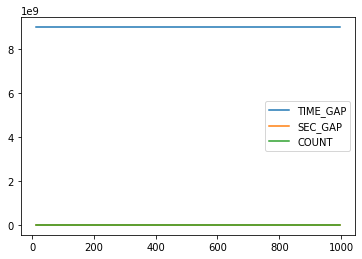

In [60]:
tf['SEC_GAP'] = tf['TIME_GAP'].dt.seconds
tf['COUNT'] = 1
tf.groupby('SEC_GAP').sum()
df = tf.groupby('SEC_GAP')
df.plot()

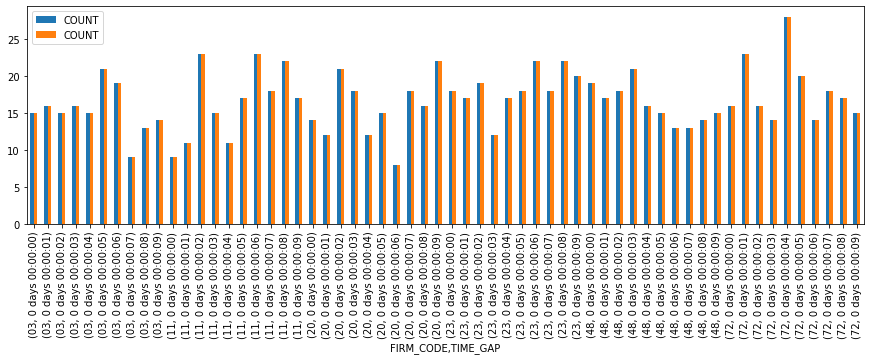

In [58]:
tf.groupby(['FIRM_CODE','TIME_GAP']).count()
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'})
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df = tf.groupby(['FIRM_CODE', 'TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df.plot(kind='bar', figsize=(15,4))

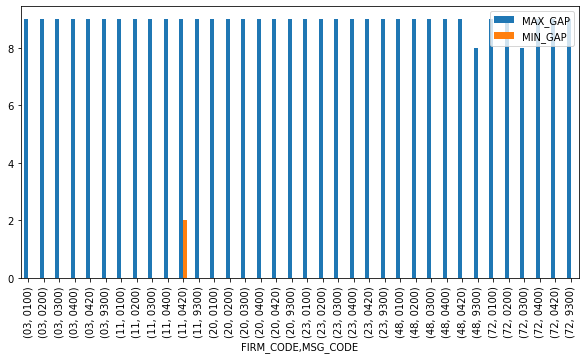

In [61]:
zf = tf[['FIRM_CODE','MSG_CODE','TIME_GAP']]
max_df = zf.groupby(['FIRM_CODE','MSG_CODE']).max().rename(columns={'TIME_GAP':'MAX_GAP'})
min_df = zf.groupby(['FIRM_CODE','MSG_CODE']).min().rename(columns={'TIME_GAP':'MIN_GAP'})
max_df = max_df.reset_index() 
min_df = min_df.reset_index() 
df = pd.merge(max_df, min_df)
df['MAX_GAP'] = df.MAX_GAP.dt.seconds
df['MIN_GAP'] = df.MIN_GAP.dt.seconds
df.set_index(['FIRM_CODE','MSG_CODE']).plot(kind='bar', figsize=(10,5))

### __(3) 행정구역별 인구변화 분석__

In [62]:
%matplotlib inline
import pandas as pd
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'Malgun Gothic'
rcParams['font.weight']='regular'
rcParams['figure.figsize'] = 15,10

In [65]:
df = pd.read_csv('행정구역_시군구_별__성별_인구수_2011_2020.csv', header=[0,1], index_col=0, encoding='CP949')
df.head()

행정구역(시군구)별  2020. 12                      ...  2021. 02                    
행정구역(시군구)별  총인구수 (명) 남자인구수 (명) 여자인구수 (명)  ...  총인구수 (명) 남자인구수 (명) 여자인구수 (명)
전국          51829023  25841029  25987994  ...  51824142  25836561  25987581
서울특별시        9668465   4701723   4966742  ...   9648606   4690282   4958324
부산광역시        3391946   1661000   1730946  ...   3387761   1658540   1729221
대구광역시        2418346   1193109   1225237  ...   2413191   1190244   1222947
인천광역시        2942828   1473943   1468885  ...   2941705   1473245   1468460

[5 rows x 9 columns]

In [66]:
for _ in df.columns:
  print(_)

('2020. 12', '총인구수 (명)')
('2020. 12', '남자인구수 (명)')
('2020. 12', '여자인구수 (명)')
('2021. 01', '총인구수 (명)')
('2021. 01', '남자인구수 (명)')
('2021. 01', '여자인구수 (명)')
('2021. 02', '총인구수 (명)')
('2021. 02', '남자인구수 (명)')
('2021. 02', '여자인구수 (명)')


In [67]:
for x in df.columns:
  print([_.replace(' ','').replace('(명)','') for _ in x ])

['2020.12', '총인구수']
['2020.12', '남자인구수']
['2020.12', '여자인구수']
['2021.01', '총인구수']
['2021.01', '남자인구수']
['2021.01', '여자인구수']
['2021.02', '총인구수']
['2021.02', '남자인구수']
['2021.02', '여자인구수']


In [68]:
colset = {}
for x in df.columns:
  y = [ _.replace(' ','').replace('(명)','') for _ in x ]
  colset[x] = tuple(y)
colset

{('2020. 12', '남자인구수 (명)'): ('2020.12', '남자인구수'),
 ('2020. 12', '여자인구수 (명)'): ('2020.12', '여자인구수'),
 ('2020. 12', '총인구수 (명)'): ('2020.12', '총인구수'),
 ('2021. 01', '남자인구수 (명)'): ('2021.01', '남자인구수'),
 ('2021. 01', '여자인구수 (명)'): ('2021.01', '여자인구수'),
 ('2021. 01', '총인구수 (명)'): ('2021.01', '총인구수'),
 ('2021. 02', '남자인구수 (명)'): ('2021.02', '남자인구수'),
 ('2021. 02', '여자인구수 (명)'): ('2021.02', '여자인구수'),
 ('2021. 02', '총인구수 (명)'): ('2021.02', '총인구수')}

In [70]:
df.columns=df.columns.values
df

,"(2020. 12, 총인구수 (명))","(2020. 12, 남자인구수 (명))","(2020. 12, 여자인구수 (명))","(2021. 01, 총인구수 (명))","(2021. 01, 남자인구수 (명))","(2021. 01, 여자인구수 (명))","(2021. 02, 총인구수 (명))","(2021. 02, 남자인구수 (명))","(2021. 02, 여자인구수 (명))"
전국,51829023,25841029,25987994,51825932,25838512,25987420,51824142,25836561,25987581
서울특별시,9668465,4701723,4966742,9657969,4695999,4961970,9648606,4690282,4958324
부산광역시,3391946,1661000,1730946,3389388,1659527,1729861,3387761,1658540,1729221
대구광역시,2418346,1193109,1225237,2415813,1191656,1224157,2413191,1190244,1222947
인천광역시,2942828,1473943,1468885,2942452,1473639,1468813,2941705,1473245,1468460
광주광역시,1450062,717348,732714,1449115,716929,732186,1447953,716331,731622
대전광역시,1463882,730699,733183,1463291,730396,732895,1462064,729663,732401
울산광역시,1136017,583708,552309,1135370,583402,551968,1132953,582190,550763
세종특별자치시,355831,177568,178263,357871,178656,179215,359569,179528,180041
경기도,13427014,6754469,6672545,13449499,6765862,6683637,13471758,6777066,6694692


In [71]:
df = df.rename(columns=colset)
df.head()

,"(2020.12, 총인구수)","(2020.12, 남자인구수)","(2020.12, 여자인구수)","(2021.01, 총인구수)","(2021.01, 남자인구수)","(2021.01, 여자인구수)","(2021.02, 총인구수)","(2021.02, 남자인구수)","(2021.02, 여자인구수)"
전국,51829023,25841029,25987994,51825932,25838512,25987420,51824142,25836561,25987581
서울특별시,9668465,4701723,4966742,9657969,4695999,4961970,9648606,4690282,4958324
부산광역시,3391946,1661000,1730946,3389388,1659527,1729861,3387761,1658540,1729221
대구광역시,2418346,1193109,1225237,2415813,1191656,1224157,2413191,1190244,1222947
인천광역시,2942828,1473943,1468885,2942452,1473639,1468813,2941705,1473245,1468460


In [73]:
df.columns=pd.MultiIndex.from_tuples(df.columns)
df

2020.12                      ...   2021.02                    
             총인구수     남자인구수     여자인구수  ...      총인구수     남자인구수     여자인구수
전국       51829023  25841029  25987994  ...  51824142  25836561  25987581
서울특별시     9668465   4701723   4966742  ...   9648606   4690282   4958324
부산광역시     3391946   1661000   1730946  ...   3387761   1658540   1729221
대구광역시     2418346   1193109   1225237  ...   2413191   1190244   1222947
인천광역시     2942828   1473943   1468885  ...   2941705   1473245   1468460
광주광역시     1450062    717348    732714  ...   1447953    716331    731622
대전광역시     1463882    730699    733183  ...   1462064    729663    732401
울산광역시     1136017    583708    552309  ...   1132953    582190    550763
세종특별자치시    355831    177568    178263  ...    359569    179528    180041
경기도      13427014   6754469   6672545  ...  13471758   6777066   6694692
강원도       1542840    776505    766335  ...   1540875    775186    765689
충청북도      1600837    811591    789246  ...   1599122    810751    788371
충청남도      2121029   1082634   1038395  ...   2119542   1082026   1037516
전라북도      1804104    896874    907230  ...   1801319    895485    905834
전라남도      1851549    930615    920934  ...   1849795    929889    919906
경상북도      2639422   1329211   1310211  ...   2636747   1328167   1308580
경상남도      3340216   1681423   1658793  ...   3336045   1679295   1656750
제주특별자치도    674635    338609    336026  ...    675137    338673    336464

[18 rows x 9 columns]

In [74]:
tf = df.T
tf

전국    서울특별시    부산광역시  ...     경상북도     경상남도  제주특별자치도
2020.12 총인구수   51829023  9668465  3391946  ...  2639422  3340216   674635
        남자인구수  25841029  4701723  1661000  ...  1329211  1681423   338609
        여자인구수  25987994  4966742  1730946  ...  1310211  1658793   336026
2021.01 총인구수   51825932  9657969  3389388  ...  2637639  3338396   674615
        남자인구수  25838512  4695999  1659527  ...  1328384  1680383   338553
        여자인구수  25987420  4961970  1729861  ...  1309255  1658013   336062
2021.02 총인구수   51824142  9648606  3387761  ...  2636747  3336045   675137
        남자인구수  25836561  4690282  1658540  ...  1328167  1679295   338673
        여자인구수  25987581  4958324  1729221  ...  1308580  1656750   336464

[9 rows x 18 columns]

In [75]:
tf = tf.unstack()
tf

전국                        서울특별시  ...     경상남도 제주특별자치도                
            남자인구수     여자인구수      총인구수    남자인구수  ...     총인구수   남자인구수   여자인구수    총인구수
2020.12  25841029  25987994  51829023  4701723  ...  3340216  338609  336026  674635
2021.01  25838512  25987420  51825932  4695999  ...  3338396  338553  336062  674615
2021.02  25836561  25987581  51824142  4690282  ...  3336045  338673  336464  675137

[3 rows x 54 columns]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

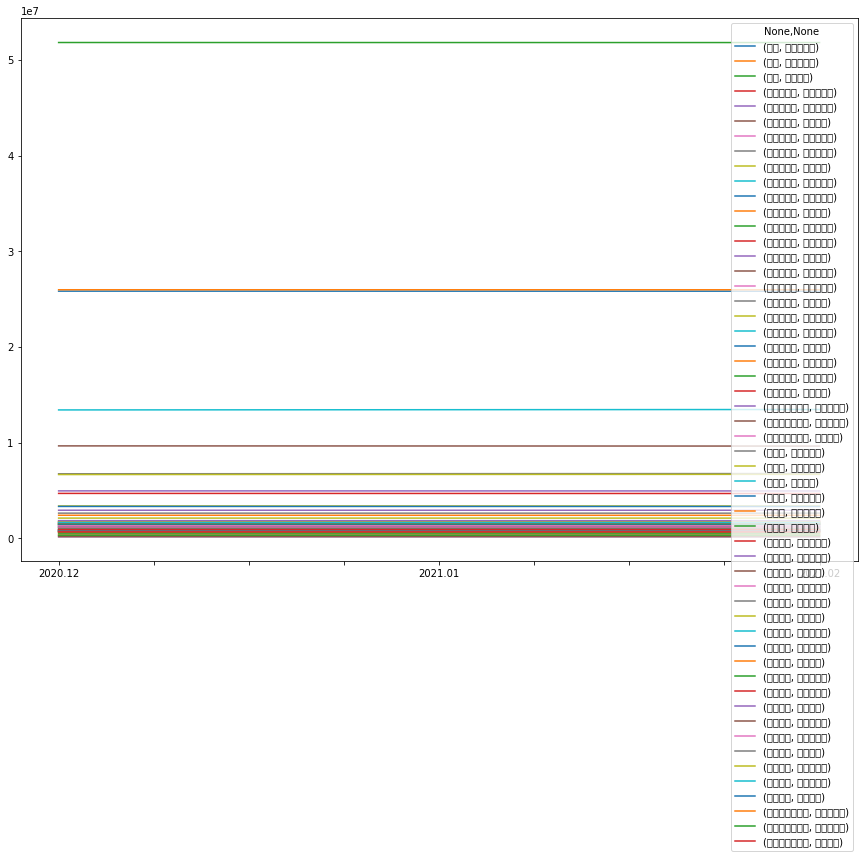

In [77]:
tf.plot()
#한글 인코딩 문제 있으나, 결과는 똑같이 나옴

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_

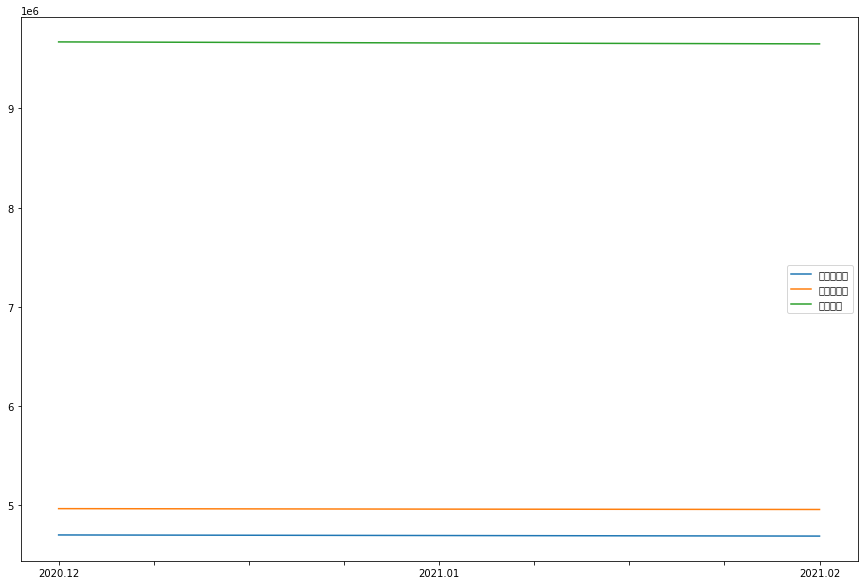

In [78]:
tf['서울특별시'].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_

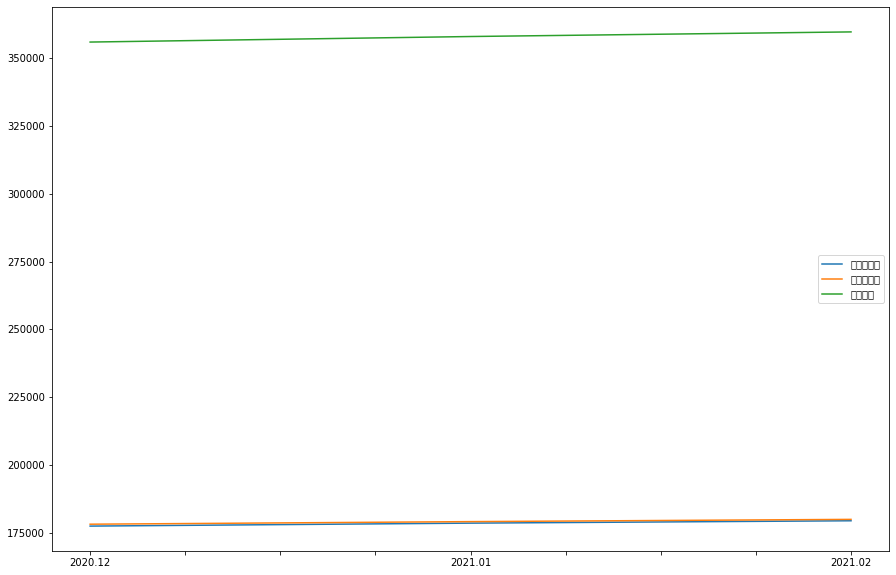

In [79]:
tf['세종특별자치시'].plot()

### __(4) 코로나19 (COVID-19) 감염자 분석__

In [80]:
df = pd.read_csv('PatientInfo.csv')
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [81]:
df['count'] = 1
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state', 'count'],
      dtype='object')

In [82]:
df.country.unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [84]:
df.groupby('country').count()[['patient_id']]

,patient_id
country,
Bangladesh,5
Canada,1
China,11
Foreign,7
France,1
Germany,1
India,1
Indonesia,2
Korea,5123


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


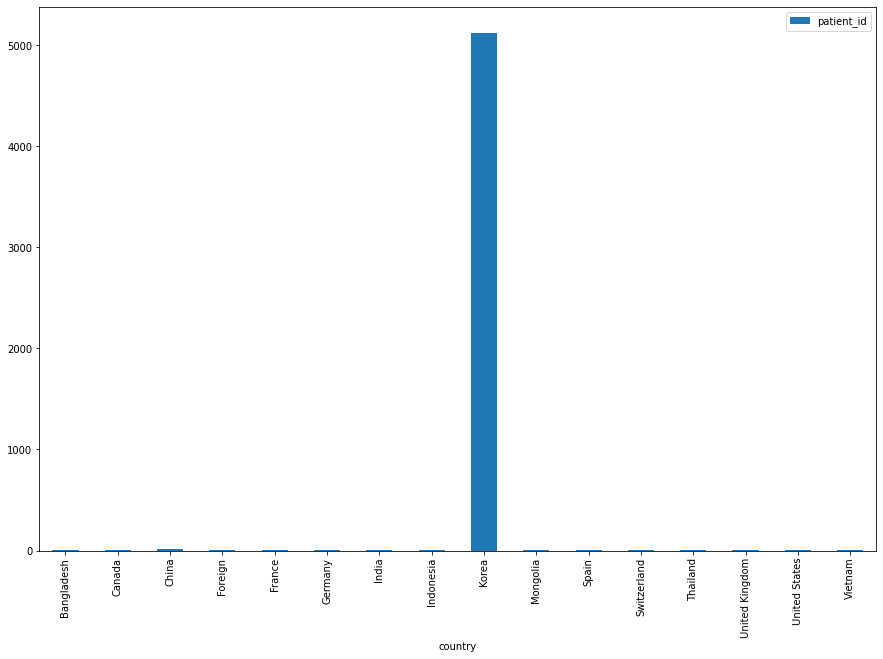

In [85]:
df.groupby('country').count()[['patient_id']].plot(kind='bar')

In [89]:
df.groupby('infection_case').sum()[['count']]

,count
infection_case,
Anyang Gunpo Pastors Group,1
Biblical Language study meeting,3
Bonghwa Pureun Nursing Home,31
Changnyeong Coin Karaoke,4
Cheongdo Daenam Hospital,21
Coupang Logistics Center,80
Daejeon door-to-door sales,1
Daezayeon Korea,3
Day Care Center,43


In [118]:
rf = df.groupby('confirmed_date').sum()
rf['dead'] = df.groupby('deceased_date').sum()[['count']]
rf['contact_number'] = df.groupby('contact_number').sum()[['count']]
rf = rf[['count', 'dead', 'contact_number']]

rf['total_dead'] = rf['dead'].cumsum()
rf['total_count'] = rf['count'].cumsum()
rf['total_contact'] = rf['contact_number'].cumsum()
rf

,count,dead,contact_number,total_dead,total_count,total_contact
confirmed_date,,,,,,
2020-01-20,1,NaN,NaN,NaN,1,NaN
2020-01-23,1,NaN,NaN,NaN,2,NaN
2020-01-26,1,NaN,NaN,NaN,3,NaN
2020-01-27,1,NaN,NaN,NaN,4,NaN
2020-01-30,4,NaN,NaN,NaN,8,NaN
...,...,...,...,...,...,...
2020-06-26,40,NaN,NaN,NaN,5044,NaN
2020-06-27,48,NaN,NaN,NaN,5092,NaN
2020-06-28,38,NaN,NaN,NaN,5130,NaN


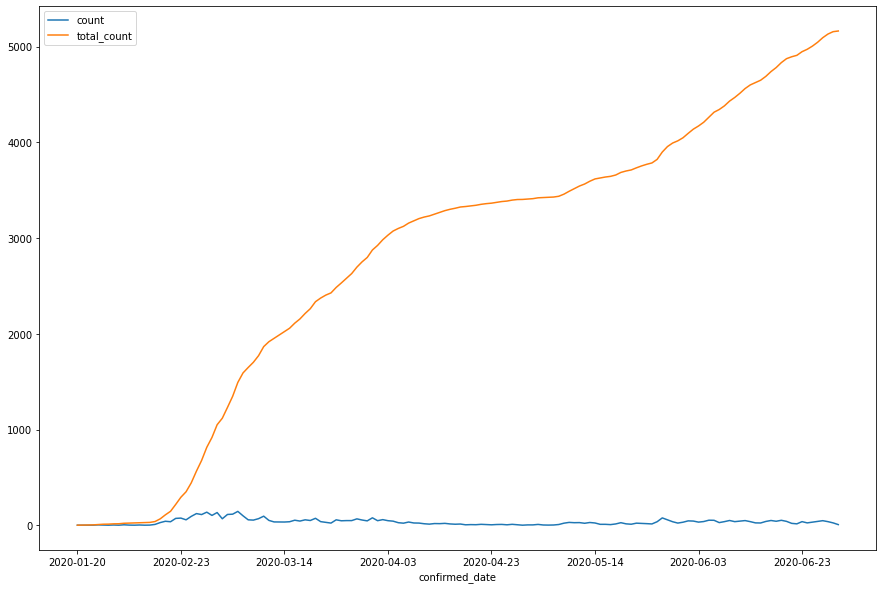

In [116]:
rf[['count','total_count']].plot()

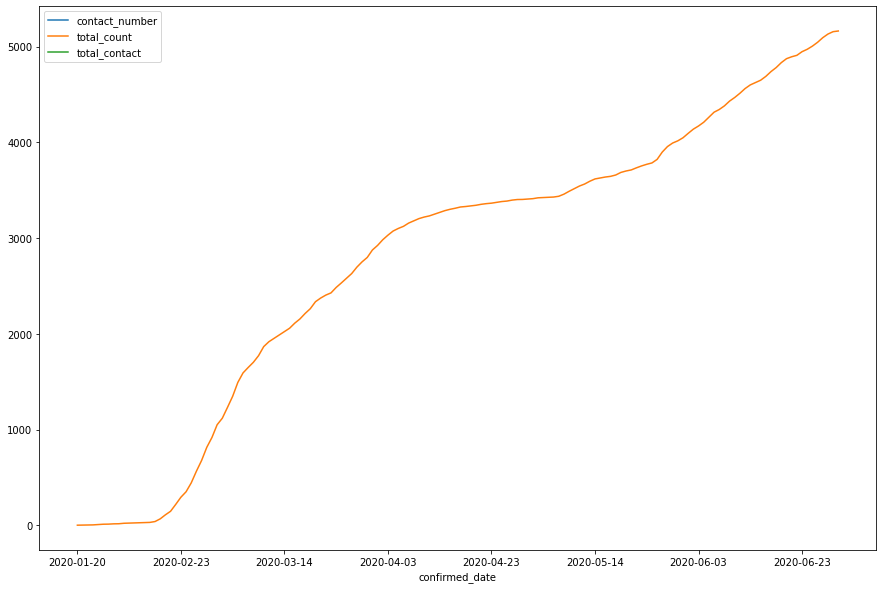

In [119]:
rf[['contact_number','total_count', 'total_contact']].plot()